<a href="https://colab.research.google.com/github/Sachin243/Sparks/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task1 - Score prediction using Supervised ML**

**Name: Sachin Singh**

**Problem Statement:**


---



**1. Predict the no. of a student based on his study hours.**

---



**2. Predict the no. of a student who studies 9.25 hours per day.**


In [1]:
## import libraries - numpy, pandas and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## import data 
data_score = pd.read_csv('student_score.csv')

In [3]:
## first five rows of data
data_score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
## size of data 
data_score.shape


(25, 2)

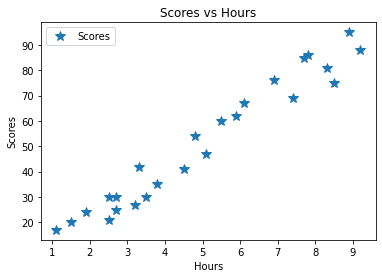

In [5]:
## visualzing the score data
data_score.plot(x = 'Hours', y = 'Scores', style = '*', markersize = 10)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores vs Hours')
plt.show()

From the graph visualization, we can conclude that there is a linear correlation between scores and hours.

In [6]:
## splitting the data into dependent and independent features
X = data_score.iloc[:,:-1].values
Y = data_score.iloc[:, -1].values

In [7]:
# hours
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [8]:
# scores
print(Y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [26]:
## splitting the data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/6, random_state = 0)

In [27]:
## training model on training set using linear regression 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

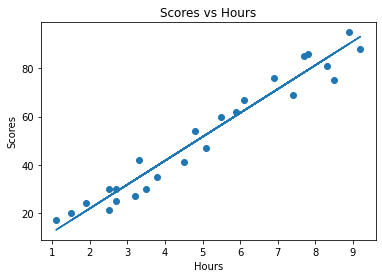

In [28]:
## regression line 
line = regressor.coef_*X + regressor.intercept_
## plotting data on a regrssion line
plt.scatter(X,Y)
plt.plot(X, line);
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores vs Hours')
plt.show()

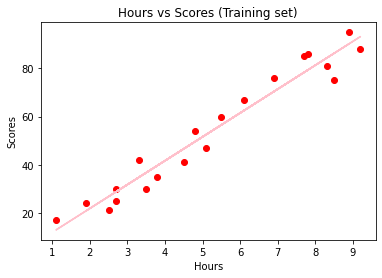

In [29]:
## visualising training set results
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'pink')
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [30]:
## predicting test set results 
Y_predict = regressor.predict(X_test)
print(Y_predict)


[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


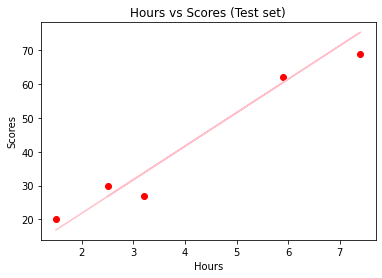

In [31]:
## visualizing test set results
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'pink')
plt.title('Hours vs Scores (Test set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [32]:
## actual vs predicted scores
comparison = pd.DataFrame({'Actual': Y_test, 'Predicted':  Y_predict})
comparison

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [35]:
## model evaluation 
## mean absolute error
from sklearn import metrics
mean_error = metrics.mean_absolute_error(Y_test, Y_predict)
print('Mean absolute error is %.3f' %mean_error)

Mean absolute error is 4.184


In [17]:
## variance
variance = metrics.r2_score(Y_test, Y_predict)
print('Variance is %.2f' %variance)

Variance is 0.95


In [25]:
## Predicting score for a student who studies 9.5 hours/day
hours = [[9.25]]
predict_score = regressor.predict(hours)
print('Score of a student who studies {} hours per day is %.2f.'.format(hours[0][0]) %predict_score[0])

Score of a student who studies 9.25 hours per day is 93.69.
